# Data Visualization

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sc1015dsai-final-fce2-team-1-23-24/categories_one.csv
/kaggle/input/sc1015dsai-final-fce2-team-1-23-24/final.csv
/kaggle/input/sc1015dsai-final-fce2-team-1-23-24/with_subject.csv
/kaggle/input/sc1015dsai-final-fce2-team-1-23-24/no_subject.csv


In [3]:
df = pd.read_csv("/kaggle/input/sc1015dsai-final-fce2-team-1-23-24/final.csv")

In [4]:
df.describe()

,TruthRating
count,361363.000000
mean,1.357978
std,1.900495
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,5.000000


In [5]:
df.head()

,Text,Subject,TruthRating,Country,clean_text
0,"WHO praises India's Aarogya Setu app, says it ...",COVID-19,5,India,praises india aarogya setu app says helped ide...
1,"In Delhi, Deputy US Secretary of State Stephen...",VIOLENCE,5,India,delhi deputy us secretary state stephen biegun...
2,LAC tensions: China's strategy behind delibera...,TERROR,5,India,lac tensions china strategy behind deliberatel...
3,India has signed 250 documents on Space cooper...,COVID-19,5,India,india signed documents space cooperation count...
4,Tamil Nadu chief minister's mother passes away...,ELECTION,5,India,tamil nadu chief minister mother passes away


## Pie Chart of Percentage of Various TruthRatings in Dataset:

### The pie chart is used as an effective way to get a quick overview of the overall split of the entire dataset, by the truthfulness rating. As we can see, the highest number of data by far is of truth rating 0. This was intentional primarily as fake news typically has  distinctive characteristics, like strong and emotion-evoking language. A larger sample of fake news would potentially train our algorithm to better identify these patterns, and have a higher accuracy for fake news detection. 


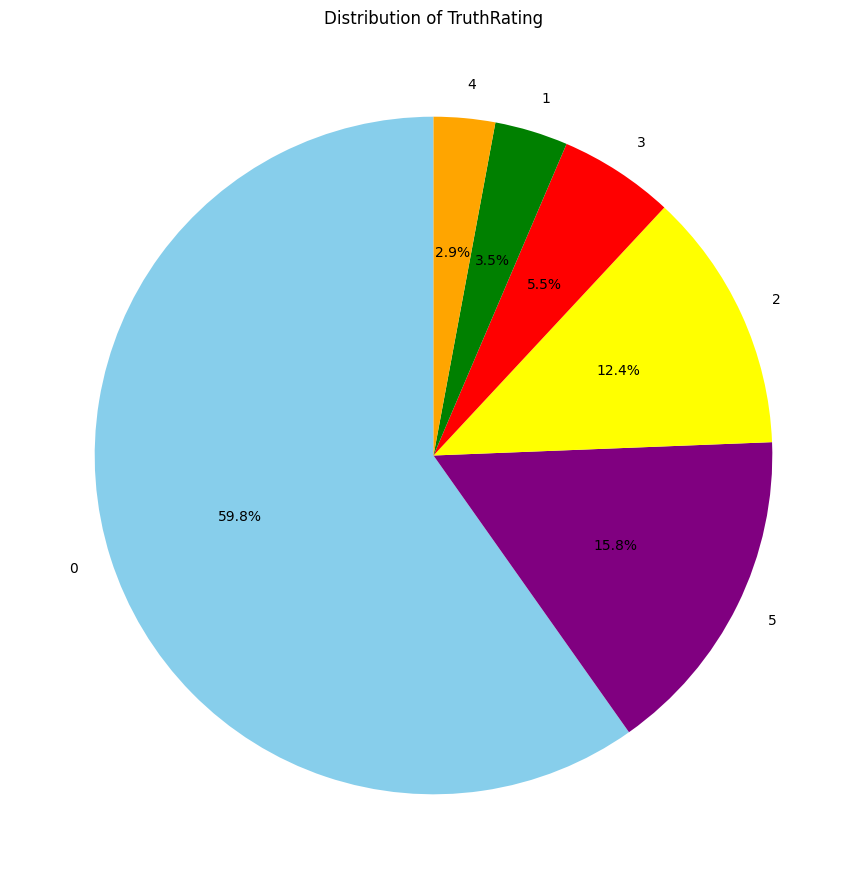

In [25]:
category_counts = df['TruthRating'].value_counts()
plt.figure(figsize=(11, 11))
plt.pie(
    category_counts,
    labels=category_counts.index,  # Category names for the labels
    autopct='%1.1f%%',  # Add percentage to the slices
    startangle=90,  # Start angle for the pie chart
    colors=['Skyblue',"Purple", 'Yellow', 'Red','Green','Orange'],  # Colors for the slices
)
plt.title('Distribution of TruthRating')
plt.show()

## Typical Histogram of Number of Articles per Country

### In this graph, we utilize a typical histogram to observe the split of our data further by country. We can observe that there are much more American articles than Indian ones.


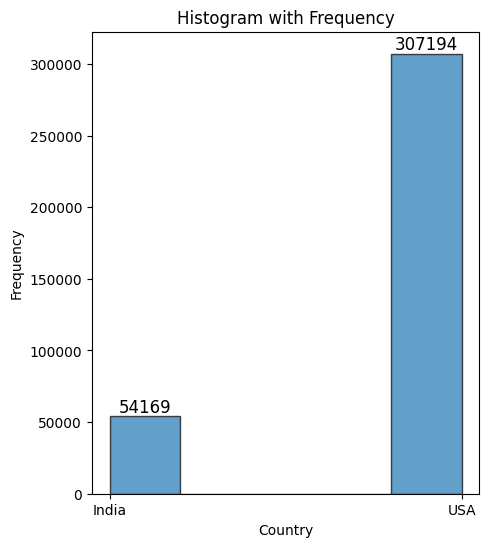

In [39]:
fig, ax = plt.subplots(figsize=(5, 6))
n, bins, patches = ax.hist(df['Country'], bins=5, edgecolor='black', alpha=0.7)
for count, bin_start, bin_end in zip(n, bins[:-1], bins[1:]):
    if(count>0):
        x = (bin_start + bin_end) / 2
        ax.text(x, count + 0.5, f'{int(count)}', ha='center', va='bottom', fontsize=12)

ax.set_xlabel('Country')
ax.set_ylabel('Frequency')
ax.set_title('Histogram with Frequency')

# Show the plot
plt.show()

## Dual-variable Histogram of Number of Articles by TruthRating per Country

### In this version of the histogram, we showcase the number of news articles for each truth rating and country. The side-by-side comparison of the two countries,alongside the good ink-to-data ratio, make it extremely obvious to observe one key thing. In our dataset, the American articles have a significantly higher proportion of articles with TruthRating 0. This is in stark contrast to the Indian articles, which are much more balanced, favouring articles of TruthRating 5 slightly even. We can thus draw the insight that the balance of probability for receiving fake news is higher from American sources.

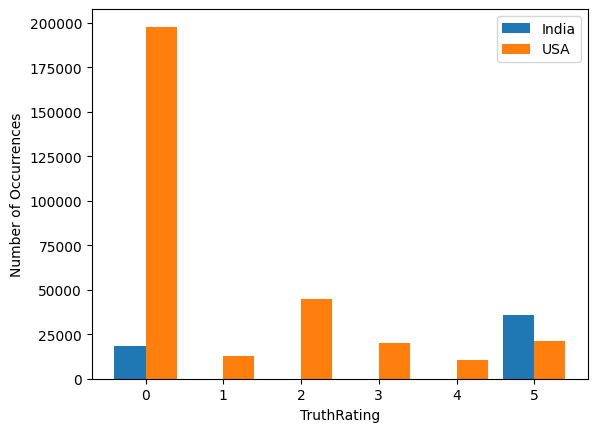

In [53]:
grouped_data = df.groupby('Country')['TruthRating']

# Extract India and USA data
india_data = grouped_data.get_group('India')
usa_data = grouped_data.get_group('USA')

# Define bin edges
bin_edges = np.arange(0, 7) - 0.5  # Shift the bin edges by 0.5 to center the bars

# Plot histogram
plt.hist([india_data, usa_data], bins=bin_edges, label=['India', 'USA'], width=0.4)
plt.xlabel('TruthRating')
plt.ylabel('Number of Occurrences')
plt.xticks(range(6))
plt.legend()
plt.show()

## Heatmap of Country Vs Subject

### We have used a heatmap to display the relationship of countries with the number of news articles from the different subjects. We observe that US governmental articles far outnumber the rest of the country and subject combinations. Considering this, and how the US has significantly more articles with TruthRating 0, we hypothesized that a majority of the governmental articles will be of low TruthRating. We explore this in our next visualization.

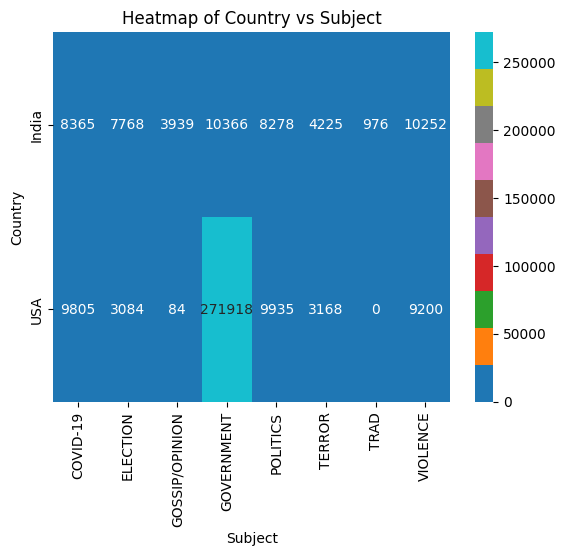

In [54]:
cross_tab = pd.crosstab(df['Country'], df['Subject'])
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='tab10')
plt.xlabel('Subject')
plt.ylabel('Country')
plt.title('Heatmap of Country vs Subject')
plt.show()


## Histogram of Subjects with Average TruthRating

### To explore our hypothesis from the heatmap, we plotted a histogram of the average TruthRating by subject. We can clearly see that the average TruthRating of Government articles is about 1.0, which indicates our hypothesis is sound, and that a majority of government articles are of low TruthRating

/tmp/ipykernel_33/1688296161.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Subject', y='TruthRating', data=grouped, ci=None, palette='Set2')


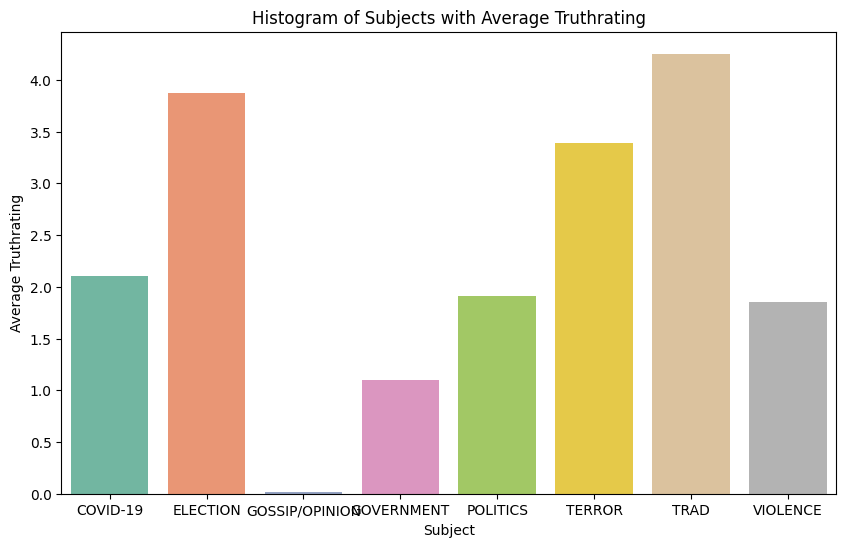

In [56]:
grouped = df.groupby('Subject')['TruthRating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='TruthRating', data=grouped, ci=None, palette='Set2')

# Label the axes
plt.xlabel('Subject')
plt.ylabel('Average Truthrating')  # This example uses the mean
plt.title('Histogram of Subjects with Average Truthrating')

# Show the plot
plt.show()

## Word Cloud

A word cloud is a visual representation of text data, and words with higher frequency appear larger and more prominent.
This enables us to get a quick overview of the most emphasized words within the selected data.  For our Word Cloud, to zero in on what is most common in fake news, we have limited the word cloud to only look for words within TruthRatings 0,1 and 2. As can be seen, “Fact Check”, “new”, “say”, “look”, “people” and “found” are some of the most prominent words. 


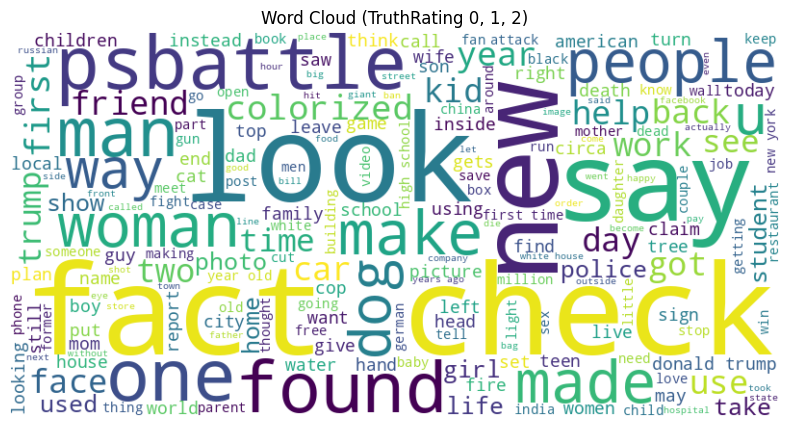

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

filtered_text = ' '.join(df[df['TruthRating'].isin([0, 1, 2])]['clean_text'].astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud (TruthRating 0, 1, 2)")
plt.show()